In [86]:
import pandas as pd

class Read:
    def __init__(self):
        pass
        
    def time_str_adjust(self,str_):
        return str_.replace(' KST', '')
    
    def transform(self, path):
        df_co2 = pd.read_excel(path, sheet_name = 'S1.data.#5004', header=1, index_col=0).reset_index(drop=False) # CO2
        df_co2.rename(columns={'Unnamed: 1' : 'co2'}, inplace=True)
        df_pm25 = pd.read_excel(path, sheet_name = 'S1.data.#5009', header=1, index_col=0).reset_index(drop=False) # pm2.5 초미세먼지
        df_pm25.rename(columns={'Unnamed: 1' : 'pm25'}, inplace=True)
        df_pm10 = pd.read_excel(path, sheet_name = 'S1.data.#500A', header=1, index_col=0).reset_index(drop=False) # pm10 미세먼지
        df_pm10.rename(columns={'Unnamed: 1' : 'pm10'}, inplace=True)
        df_tem = pd.read_excel(path, sheet_name = 'S1.data.#500C', header=1, index_col=0).reset_index(drop=False) # humid
        df_tem.rename(columns={'Unnamed: 1' : 'tem'}, inplace=True)
        df_hum = pd.read_excel(path, sheet_name = 'S1.data.#500E', header=1, index_col=0).reset_index(drop=False) # temperature
        df_hum.rename(columns={'Unnamed: 1' : 'hum'}, inplace=True)
        df_voc = pd.read_excel(path, sheet_name = 'S1.data.#500F', header=1, index_col=0).reset_index(drop=False) # VOC
        df_voc.rename(columns={'Unnamed: 1' : 'voc'}, inplace=True)
        
        df_lst =[df_pm25, df_pm10,
                     df_tem, df_hum, df_voc]
        
        df = df_co2
        for i in df_lst:
            df = pd.merge(df, i, how='left', on='index')
        
        df.rename(columns={'index' : 'datetime'}, inplace=True)
        df['datetime'] = df['datetime'].transform(self.time_str_adjust, axis=0)
        df['datetime'] = pd.to_datetime(df.datetime)
        df.reset_index(drop=True, inplace=True)
        return df
        
        

In [98]:
def visualization(df):
    f, axes = plt.subplots(3, 2)
    f.set_size_inches((20, 15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    axes[0, 0].plot(df.datetime, df.co2, color = 'b', alpha = 1 )
    axes[0, 0].set_title('co2', size=20)
    axes[0, 1].plot(df.datetime, df.pm25, color = 'r', alpha = 1 )
    axes[0, 1].set_title('pm25', size=20)
    axes[1, 0].plot(df.datetime, df.pm10, color = 'g', alpha = 1 )
    axes[1, 0].set_title('pm10', size=20)
    axes[1, 1].plot(df.datetime, df.tem, color = 'black', alpha = 1)
    axes[1, 1].set_title('tem', size=20)
    axes[2, 0].plot(df.datetime, df.hum, color = 'purple', alpha = 1 )
    axes[2, 0].set_title('hum', size=20)

In [99]:
read = Read()
df_bb_care = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_care1.csv')
df_bb_lib_1 = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_Lib1.csv')
df_bb_lib_2 = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_Lib2.csv')
df_bb_lib_3 = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_Lib3.csv')
df_bb_S_1 = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_S1.csv')
df_bb_S_2 = read.transform('/Users/jkky/Documents/air_deep/testdata/BB_S2.csv')
df_ys_507 = read.transform('/Users/jkky/Documents/air_deep/testdata/YS_507.csv')

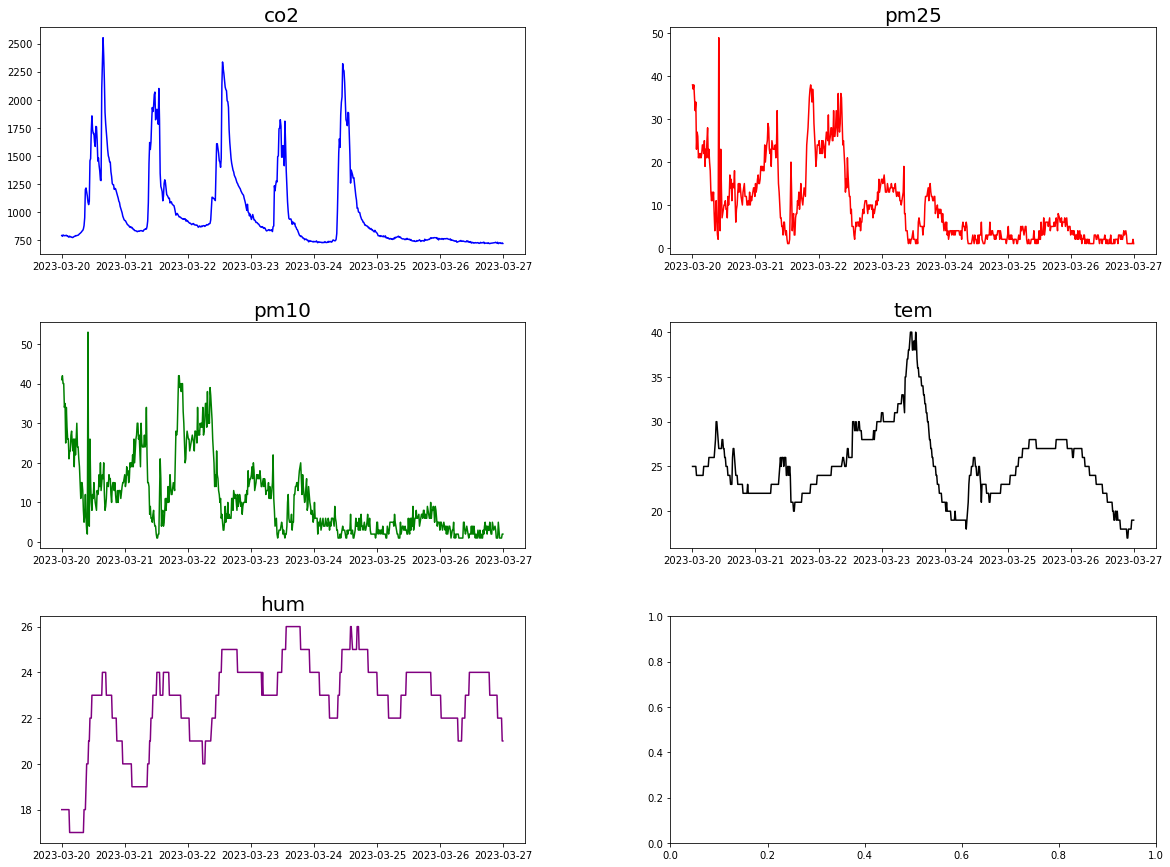

In [100]:
visualization(df_bb_lib_1)

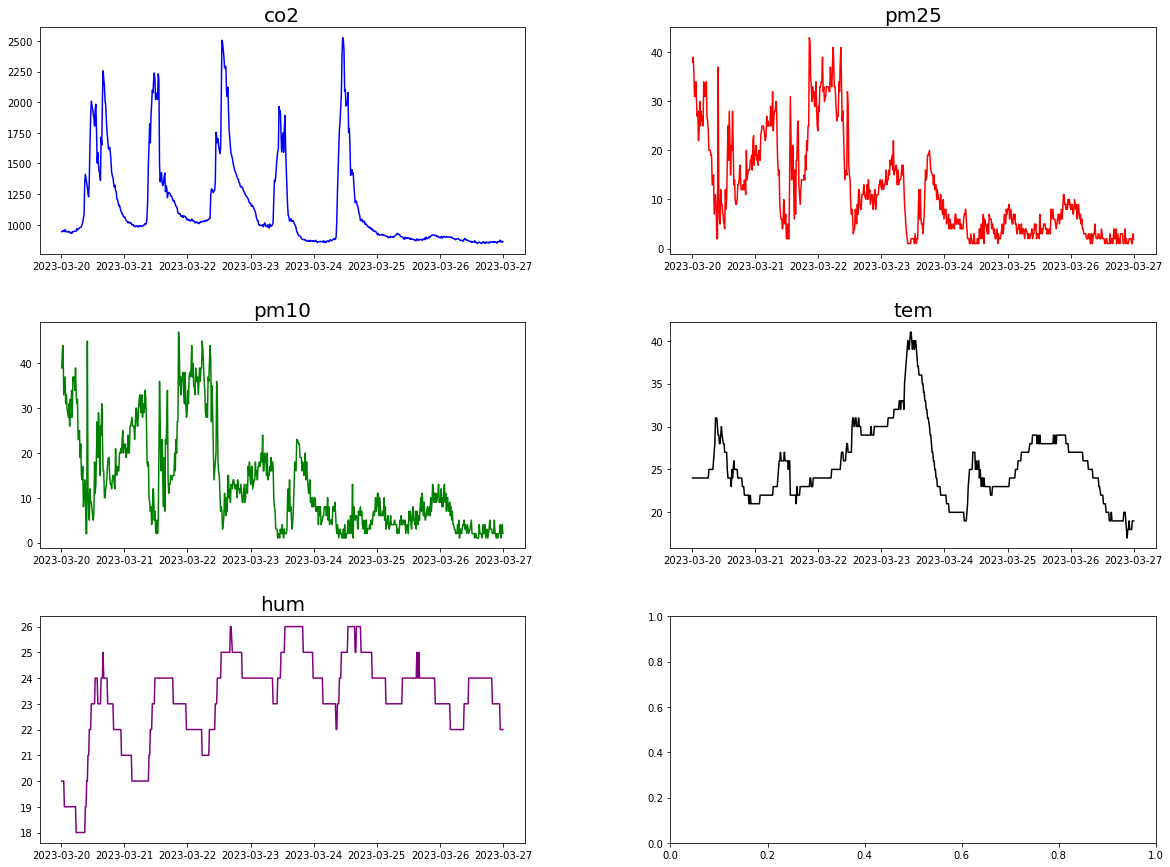

In [101]:
visualization(df_bb_lib_2)

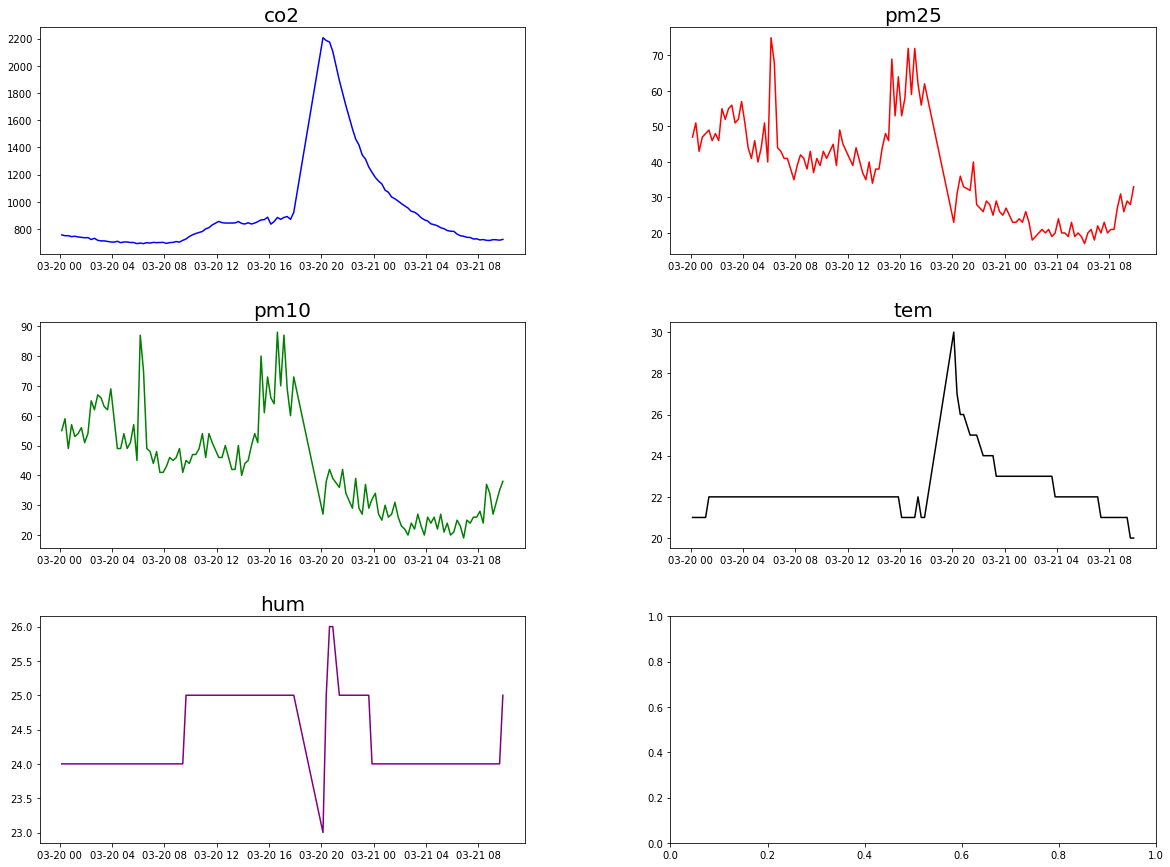

In [102]:
visualization(df_ys_507)

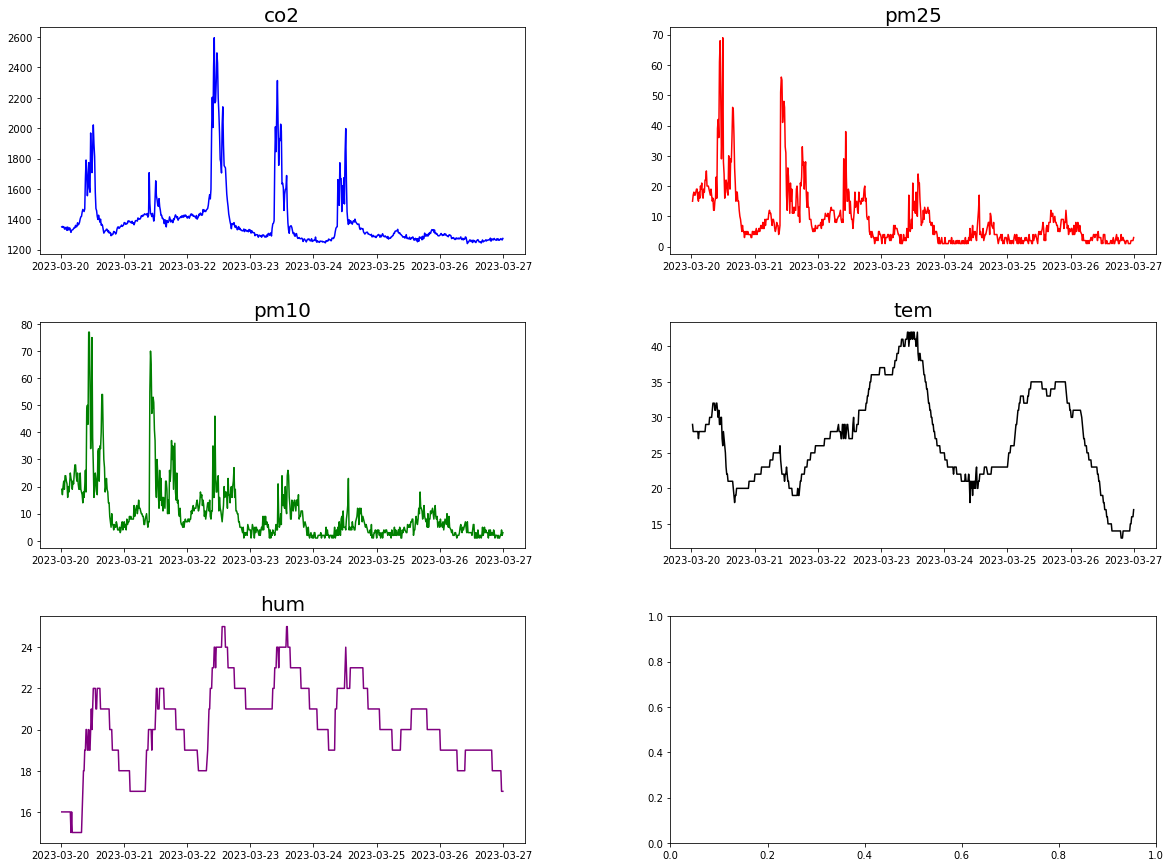

In [103]:
visualization(df_bb_S_1)

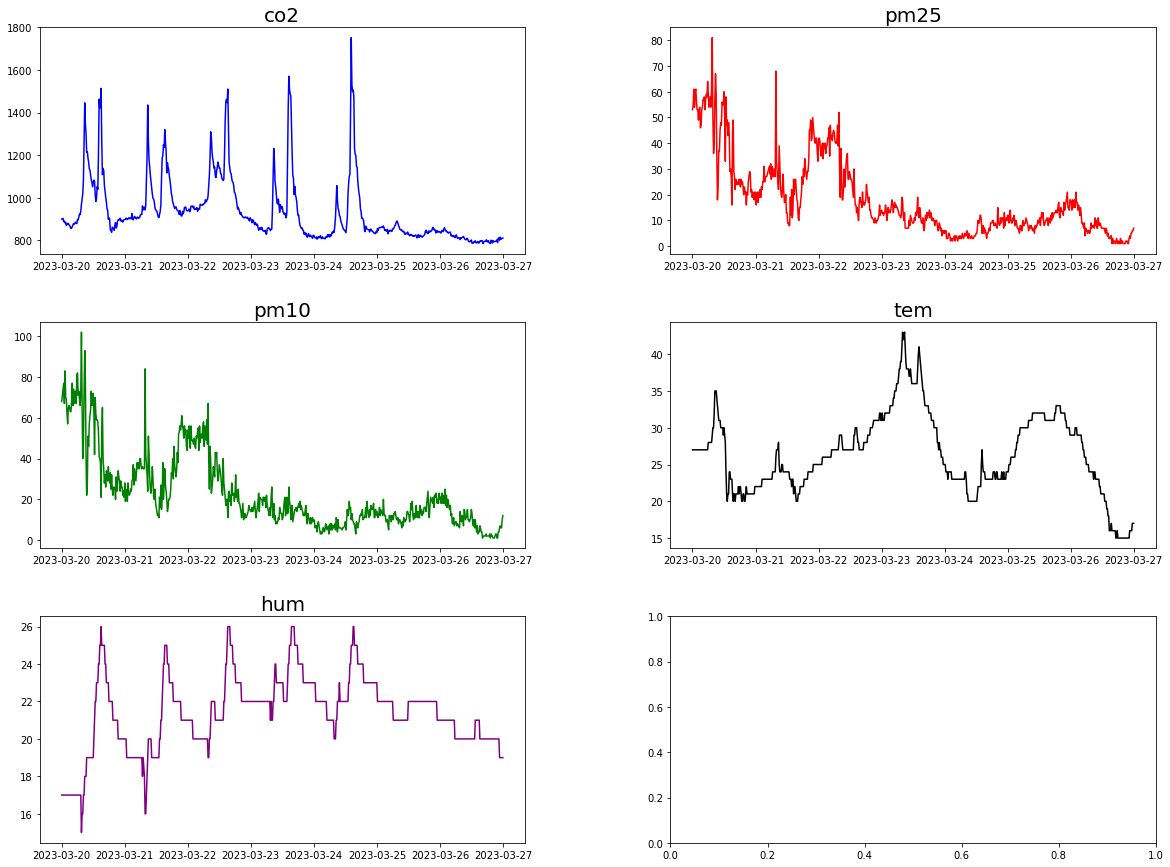

In [104]:
visualization(df_bb_care)